In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
data = pd.read_csv('dataset.csv')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [84]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [85]:
data.isna().sum() / len(data) * 100

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age at enrollment                                 0.0
International               

In [86]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [87]:
data['Target'] = data['Target'].map({
    'Dropout' : 0,
    'Enrolled' : 1,
    'Graduate' : 2
})

In [88]:
data['Target'].unique()

array([0, 2, 1])

In [89]:
x = data['Target'].value_counts().index
y = data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column:')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

/home/farid/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py:2468: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Displaced'}>],
       [<Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Scholarship holder'}>,
        <Axes: title={'center': 'Age at enrollment'}>],
       [<Axes: 

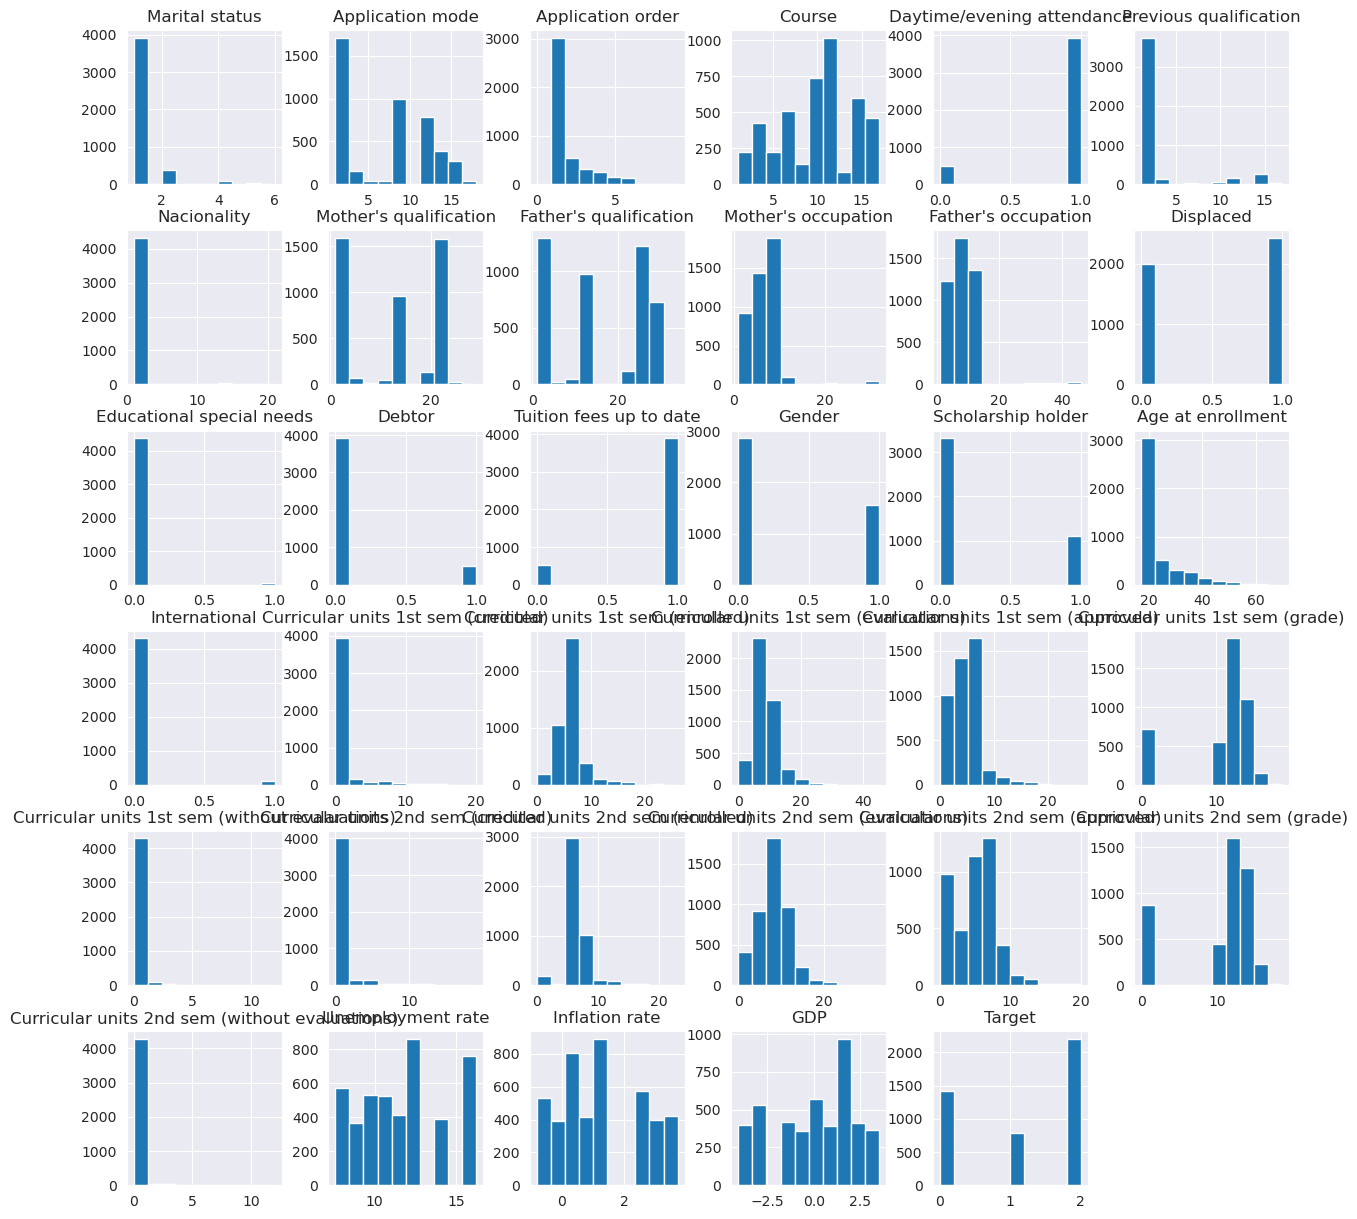

In [90]:
sns.set_style('darkgrid')
data.hist(figsize=(15,15))

***Data Cleaning***

In [91]:
for column in data.columns:
    print(column + ':')
    print(data[column].unique())
    print(data[column].value_counts())
    print('_________________________________________________________________________')

Marital status:
[1 2 4 3 5 6]
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
_________________________________________________________________________
Application mode:
[ 8  6  1 12  9 17 15 16 14  4 13  7  3  2  5 18 10 11]
Application mode
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: count, dtype: int64
_________________________________________________________________________
Application order:
[5 1 2 4 3 6 9 0]
Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
_________________________________________________________________________
Course:
[ 2 11  5 15  3 17 12 10 14 16  6  8 13  9  4  1  7]
Course
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3  

In [92]:
columns_to_round = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
data[columns_to_round] = data[columns_to_round].round(2)

***creation new 6 features***
1- Total Average
2- Attendance Time
3- Economic Indicator
4- Financial Behaviour
5- Mother Support
6- Father Support
7- Parental Support
8- Financial Status

In [93]:
data['Total Average'] = (data['Curricular units 1st sem (grade)'] +
                         data['Curricular units 2nd sem (grade)']) / 2

In [94]:
data['Total Average'] = data['Total Average'].round(2)

In [95]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total Average
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.00,0,10.8,1.4,1.74,0,0.00
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.67,0,13.9,-0.3,0.79,2,13.84
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.00,0,10.8,1.4,1.74,0,0.00
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.40,0,9.4,-0.8,-3.12,2,12.92
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.00,0,13.9,-0.3,0.79,2,12.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,6,8,5,12.67,0,15.5,2.8,-4.06,2,13.14
4420,1,1,2,15,1,1,19,1,1,10,...,6,6,2,11.00,0,11.1,0.6,2.02,0,11.50
4421,1,1,1,12,1,1,1,22,27,10,...,8,9,1,13.50,0,13.9,-0.3,0.79,0,14.20
4422,1,1,1,9,1,1,1,22,27,8,...,5,6,5,12.00,0,9.4,-0.8,-3.12,2,12.90


In [96]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [97]:
data['Attendance Time'] = (data['Curricular units 1st sem (enrolled)'] + 
                           data['Curricular units 1st sem (approved)']) * 2

In [98]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total Average,Attendance Time
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.00,0,10.8,1.4,1.74,0,0.00,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.67,0,13.9,-0.3,0.79,2,13.84,24
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.00,0,10.8,1.4,1.74,0,0.00,12
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.40,0,9.4,-0.8,-3.12,2,12.92,24
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.00,0,13.9,-0.3,0.79,2,12.66,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.67,0,15.5,2.8,-4.06,2,13.14,22
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.00,0,11.1,0.6,2.02,0,11.50,24
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.50,0,13.9,-0.3,0.79,0,14.20,28
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.00,0,9.4,-0.8,-3.12,2,12.90,20


In [99]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [100]:
data['Economic Indicator'] = data['GDP'] - 0.25 * data['Inflation rate'] - 0.25 * data['Unemployment rate']
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total Average,Attendance Time,Economic Indicator
0,1,8,5,2,1,1,1,13,10,6,...,0,0.00,0,10.8,1.4,1.74,0,0.00,0,-1.310
1,1,6,1,11,1,1,1,1,3,4,...,6,13.67,0,13.9,-0.3,0.79,2,13.84,24,-2.610
2,1,1,5,5,1,1,1,22,27,10,...,0,0.00,0,10.8,1.4,1.74,0,0.00,12,-1.310
3,1,8,2,15,1,1,1,23,27,6,...,5,12.40,0,9.4,-0.8,-3.12,2,12.92,24,-5.270
4,2,12,1,3,0,1,1,22,28,10,...,6,13.00,0,13.9,-0.3,0.79,2,12.66,22,-2.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,5,12.67,0,15.5,2.8,-4.06,2,13.14,22,-8.635
4420,1,1,2,15,1,1,19,1,1,10,...,2,11.00,0,11.1,0.6,2.02,0,11.50,24,-0.905
4421,1,1,1,12,1,1,1,22,27,10,...,1,13.50,0,13.9,-0.3,0.79,0,14.20,28,-2.610
4422,1,1,1,9,1,1,1,22,27,8,...,5,12.00,0,9.4,-0.8,-3.12,2,12.90,20,-5.270


In [101]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [103]:
data['Economic Indicator'].value_counts()

Economic Indicator
-2.230    571
-5.270    533
-1.310    525
-1.435    445
-5.800    419
-0.905    414
-8.635    397
-2.610    390
 0.935    368
-5.045    362
Name: count, dtype: int64

In [102]:
data['Financial Behaviour'] = data['Tuition fees up to date'] + data['Scholarship holder'] - data['Debtor']
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total Average,Attendance Time,Economic Indicator,Financial Behaviour
0,1,8,5,2,1,1,1,13,10,6,...,0.00,0,10.8,1.4,1.74,0,0.00,0,-1.310,1
1,1,6,1,11,1,1,1,1,3,4,...,13.67,0,13.9,-0.3,0.79,2,13.84,24,-2.610,0
2,1,1,5,5,1,1,1,22,27,10,...,0.00,0,10.8,1.4,1.74,0,0.00,12,-1.310,0
3,1,8,2,15,1,1,1,23,27,6,...,12.40,0,9.4,-0.8,-3.12,2,12.92,24,-5.270,1
4,2,12,1,3,0,1,1,22,28,10,...,13.00,0,13.9,-0.3,0.79,2,12.66,22,-2.610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,12.67,0,15.5,2.8,-4.06,2,13.14,22,-8.635,1
4420,1,1,2,15,1,1,19,1,1,10,...,11.00,0,11.1,0.6,2.02,0,11.50,24,-0.905,-1
4421,1,1,1,12,1,1,1,22,27,10,...,13.50,0,13.9,-0.3,0.79,0,14.20,28,-2.610,2
4422,1,1,1,9,1,1,1,22,27,8,...,12.00,0,9.4,-0.8,-3.12,2,12.90,20,-5.270,2


In [104]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [105]:
data['Financial Behaviour'].value_counts()

Financial Behaviour
 1    2731
 2     992
 0     478
-1     223
Name: count, dtype: int64

In [106]:
occupation_to_weight = {
    0 : 1,
    1 : 10,
    2 : 2,
    3 : 2,
    4 : 1,
    5 : 2,
    6 : 8,
    7 : 3,
    8 : 2,
    9 : 1,
    10 : 2,
    11 : 1,
    12 : 3,
    13 : 2,
    14 : 2,
    15 : 7,
    16 : 8,
    17 : 3,
    18 : 2,
    19 : 1,
    20 : 2,
    21 : 3,
    22 : 2,
    23 : 1,
    24 : 2,
    25 : 2,
    26 : 1,
    27 : 1,
    28 : 1,
    29 : 2,
    30 : 3,
    31 : 7,
    32 : 1,
    33 : 1,
    34 : 2,
    35 : 3,
    36 : 2,
    37 : 1,
    38 : 2,
    39 : 2,
    40 : 1,
    41 : 1,
    42 : 2,
    43 : 2,
    44 : 3,
    45 : 7,
    46 : 1
}

In [107]:
data['Mother Support'] = data['Mother\'s occupation'].map(occupation_to_weight)
data['Father Support'] = data['Father\'s occupation'].map(occupation_to_weight)
data['Parental Support'] = data['Father Support'] + data['Mother Support']
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Inflation rate,GDP,Target,Total Average,Attendance Time,Economic Indicator,Financial Behaviour,Mother Support,Father Support,Parental Support
0,1,8,5,2,1,1,1,13,10,6,...,1.4,1.74,0,0.00,0,-1.310,1,8,2,10
1,1,6,1,11,1,1,1,1,3,4,...,-0.3,0.79,2,13.84,24,-2.610,0,1,1,2
2,1,1,5,5,1,1,1,22,27,10,...,1.4,1.74,0,0.00,12,-1.310,0,2,2,4
3,1,8,2,15,1,1,1,23,27,6,...,-0.8,-3.12,2,12.92,24,-5.270,1,8,1,9
4,2,12,1,3,0,1,1,22,28,10,...,-0.3,0.79,2,12.66,22,-2.610,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,2.8,-4.06,2,13.14,22,-8.635,1,8,2,10
4420,1,1,2,15,1,1,19,1,1,10,...,0.6,2.02,0,11.50,24,-0.905,-1,2,2,4
4421,1,1,1,12,1,1,1,22,27,10,...,-0.3,0.79,0,14.20,28,-2.610,2,2,2,4
4422,1,1,1,9,1,1,1,22,27,8,...,-0.8,-3.12,2,12.90,20,-5.270,2,2,2,4


In [108]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [109]:
for item in data['Economic Indicator']:
    if item != 0 :
        data['Financial Status'] = data['Economic Indicator'] * data['Financial Behaviour'] + data['Parental Support']
    else:
        data['Financial Status'] = data['Financial Behaviour'] + data['Parental Support']

data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,GDP,Target,Total Average,Attendance Time,Economic Indicator,Financial Behaviour,Mother Support,Father Support,Parental Support,Financial Status
0,1,8,5,2,1,1,1,13,10,6,...,1.74,0,0.00,0,-1.310,1,8,2,10,8.690
1,1,6,1,11,1,1,1,1,3,4,...,0.79,2,13.84,24,-2.610,0,1,1,2,2.000
2,1,1,5,5,1,1,1,22,27,10,...,1.74,0,0.00,12,-1.310,0,2,2,4,4.000
3,1,8,2,15,1,1,1,23,27,6,...,-3.12,2,12.92,24,-5.270,1,8,1,9,3.730
4,2,12,1,3,0,1,1,22,28,10,...,0.79,2,12.66,22,-2.610,1,2,2,4,1.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,-4.06,2,13.14,22,-8.635,1,8,2,10,1.365
4420,1,1,2,15,1,1,19,1,1,10,...,2.02,0,11.50,24,-0.905,-1,2,2,4,4.905
4421,1,1,1,12,1,1,1,22,27,10,...,0.79,0,14.20,28,-2.610,2,2,2,4,-1.220
4422,1,1,1,9,1,1,1,22,27,8,...,-3.12,2,12.90,20,-5.270,2,2,2,4,-6.540


In [110]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [111]:
data['Financial Status'] = data['Financial Status'].round(2)
data['Financial Status'].unique()

array([  8.69,   2.  ,   4.  ,   3.73,   1.39, -14.27,  -6.09,   3.07,
         7.39,  -7.6 ,  -1.8 ,   5.87,  13.38,  -5.64,   7.69,   1.37,
        -1.04,   1.19,   2.19,   2.1 ,   1.77,  -2.04,  -3.27,  10.93,
         5.  ,   8.56,   0.39,   4.07,  17.77,   0.96,   0.77,   5.44,
         4.93,   3.1 ,  16.  ,   7.77,   1.13,  -4.54,  -6.54,   3.77,
        -1.27,   7.36,   1.56,   2.56,  -2.27,  -1.22,   1.38,   1.69,
        -3.8 ,  13.39,   6.38,  -2.8 ,  13.77,   0.37,   2.69,   3.93,
         3.69,  -0.27,  -0.54,   9.77,  16.93,   6.61,   5.73,  -3.64,
         3.  ,  -4.64,   2.39,  -0.46,   0.56,   9.1 ,   4.73,  -7.54,
         7.56,   3.78,  -0.61,   1.07,   0.13, -13.27,   0.46,   6.  ,
        -6.64,   3.9 ,   4.96,   4.1 ,  11.31,  15.27,  -2.22,  10.73,
         1.1 ,   9.  ,  -7.09,  13.13,  11.87,   7.38,   8.19,  -0.09,
        -2.6 ,   4.2 ,   9.04,   4.87,   2.38,   5.61,   8.04,   6.23,
        14.23,   8.13,   2.77,   0.38,   3.39,  21.27,  15.1 ,   0.2 ,
      

In [112]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

***Data Normalization***

**Scaling Data with z_score**

In [114]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Target', axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.drop('Target', axis=1).columns)
data_scaled['Target'] = data['Target']
data_scaled

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,GDP,Total Average,Attendance Time,Economic Indicator,Financial Behaviour,Mother Support,Father Support,Parental Support,Financial Status,Target
0,-0.294829,0.210069,2.490896,-1.823744,0.350082,-0.386404,-0.145586,0.075111,-0.584526,-0.329669,...,0.765761,-2.165954,-2.092364,0.718709,-0.021041,2.116769,-0.331562,1.055209,1.093950,0
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,0.347199,0.706615,0.194962,0.223461,-1.389915,-0.810056,-0.747330,-0.924014,-0.080002,2
2,-0.294829,-1.111094,2.490896,-1.131112,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,0.765761,-2.165954,-0.948701,0.718709,-1.389915,-0.391938,-0.331562,-0.429208,0.270955,0
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,-1.375511,0.515664,0.194962,-0.789893,-0.021041,2.116769,-0.747330,0.807806,0.223576,2
4,1.356212,0.965018,-0.554068,-1.592866,-2.856470,-0.386404,-0.145586,1.072315,1.045384,0.670987,...,0.347199,0.461700,0.004352,0.223461,-0.021041,-0.391938,-0.331562,-0.429208,-0.187044,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.111094,3.252137,1.177663,0.350082,-0.386404,-0.145586,-1.254495,-1.399481,-0.329669,...,-1.789667,0.561326,0.004352,-2.071823,-0.021041,2.116769,-0.331562,1.055209,-0.190553,2
4420,-0.294829,-1.111094,0.207173,1.177663,0.350082,-0.386404,10.150427,-1.254495,-1.399481,0.670987,...,0.889126,0.220935,0.194962,0.872998,-2.758790,-0.391938,-0.331562,-0.429208,0.428886,0
4421,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,...,0.347199,0.781335,0.576183,0.223461,1.347834,-0.391938,-0.331562,-0.429208,-0.645043,0
4422,-0.294829,-1.111094,-0.554068,-0.207602,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.170659,...,-1.375511,0.511513,-0.186259,-0.789893,1.347834,-0.391938,-0.331562,-0.429208,-1.578589,2


In [115]:
data_scaled.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>,
        <Axes: title={'center': 'Nacionality'}>],
       [<Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>],
       [<Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Scholarship holder'}>,
        <Axes: title={'center': 'Age at enrollment'}>,
        <Axes: t

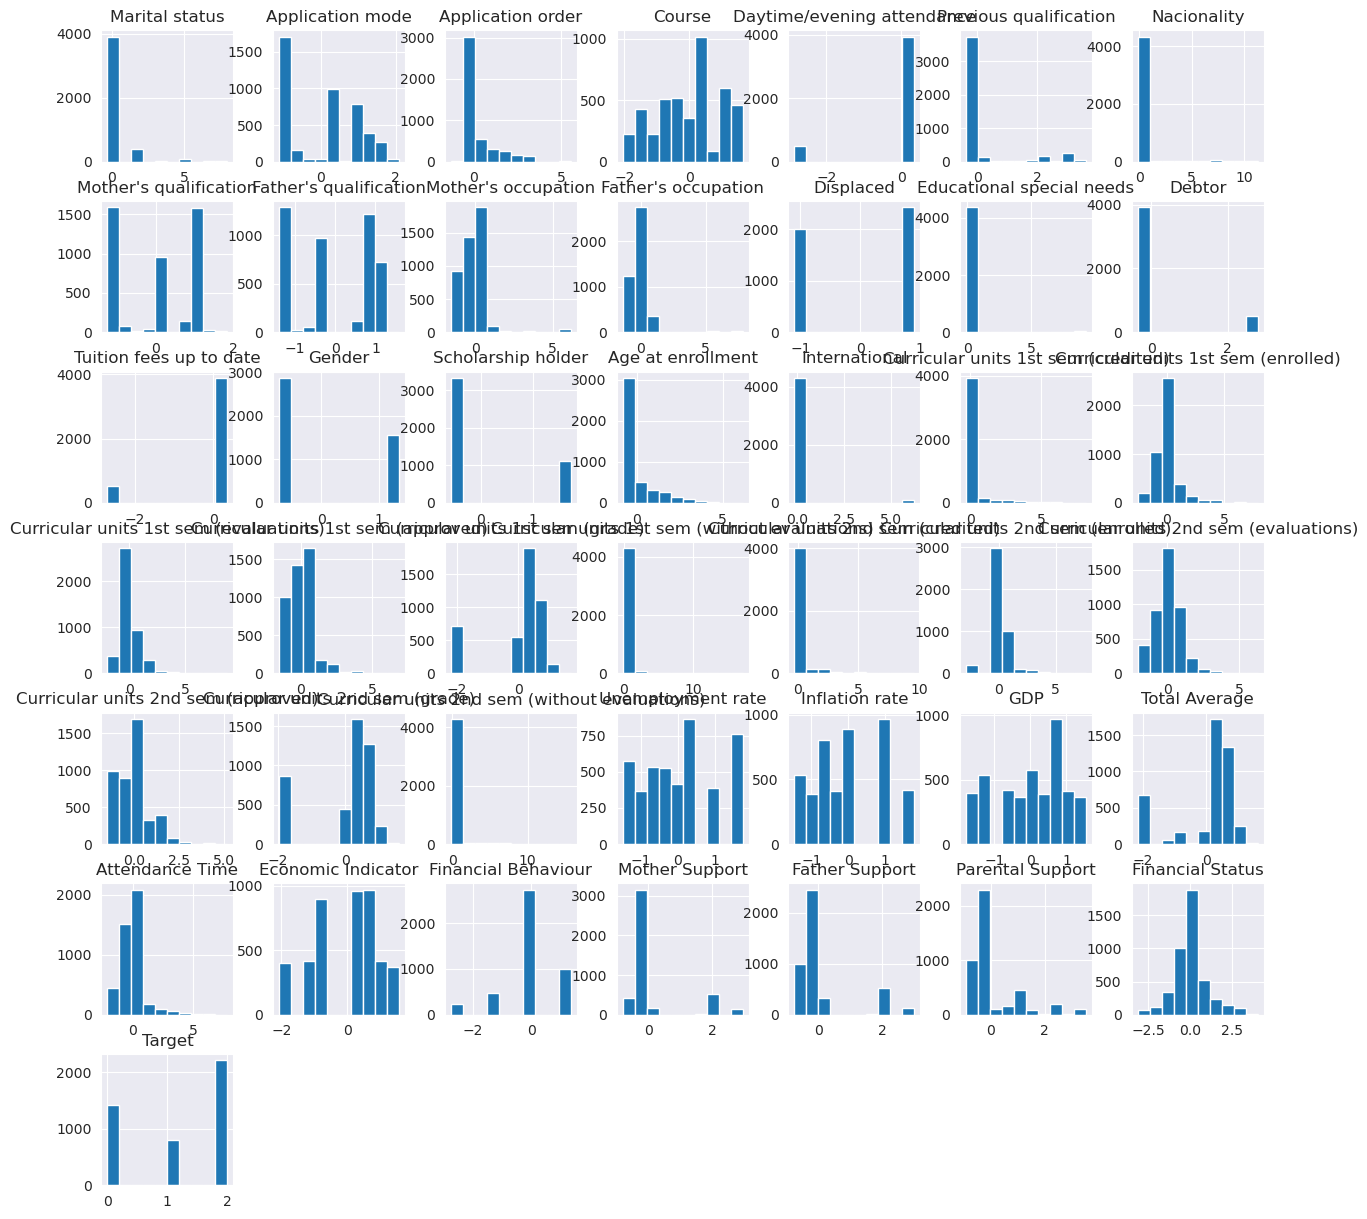

In [116]:
sns.set_style('darkgrid')
data_scaled.hist(figsize=(15,15))

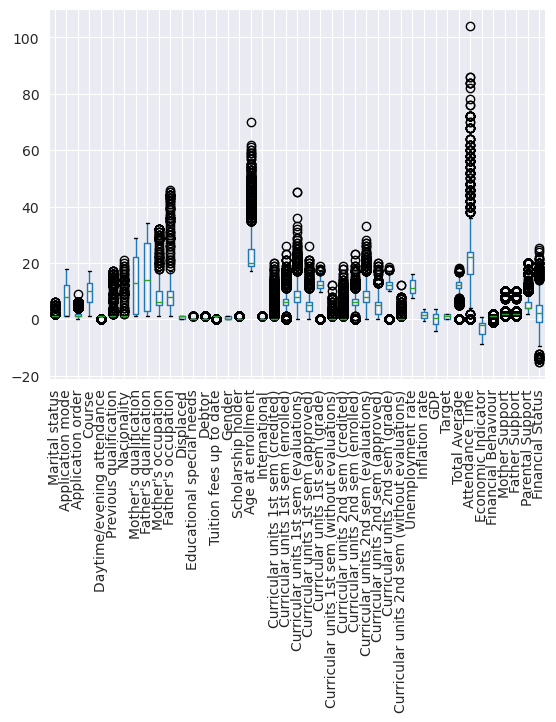

In [117]:
data.boxplot()
plt.xticks(rotation=90)
plt.show()

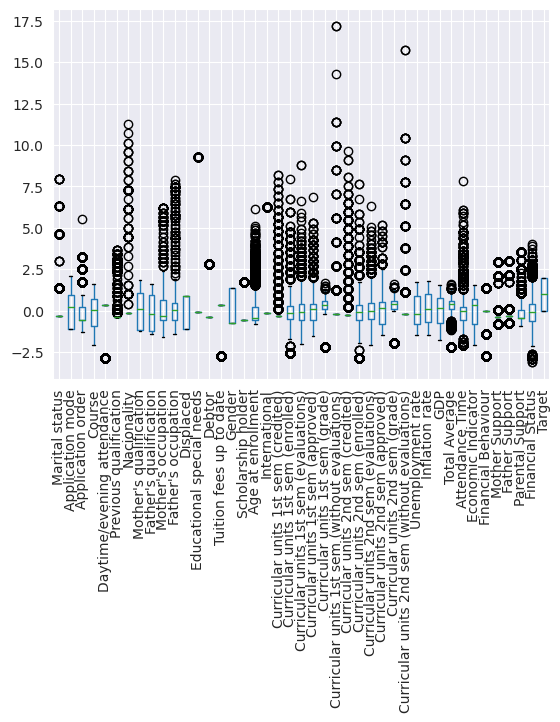

In [118]:
data_scaled.boxplot()
plt.xticks(rotation=90)
plt.show()

**Detecting Outliers with z_score**

In [39]:
# z_scores = np.abs((data_scaled - data_scaled.mean()) / data_scaled.std())
# threshold = 7
# outliers = (z_scores > threshold).any(axis=1)
# outliers_rows = data_scaled[outliers]
# outliers_rows

In [40]:
# data_without_outliers = data_scaled[~outliers]
# data_without_outliers

In [41]:
# data_without_outliers.boxplot()
# plt.xticks(rotation=90)
# plt.show()

In [119]:
data_scaled.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

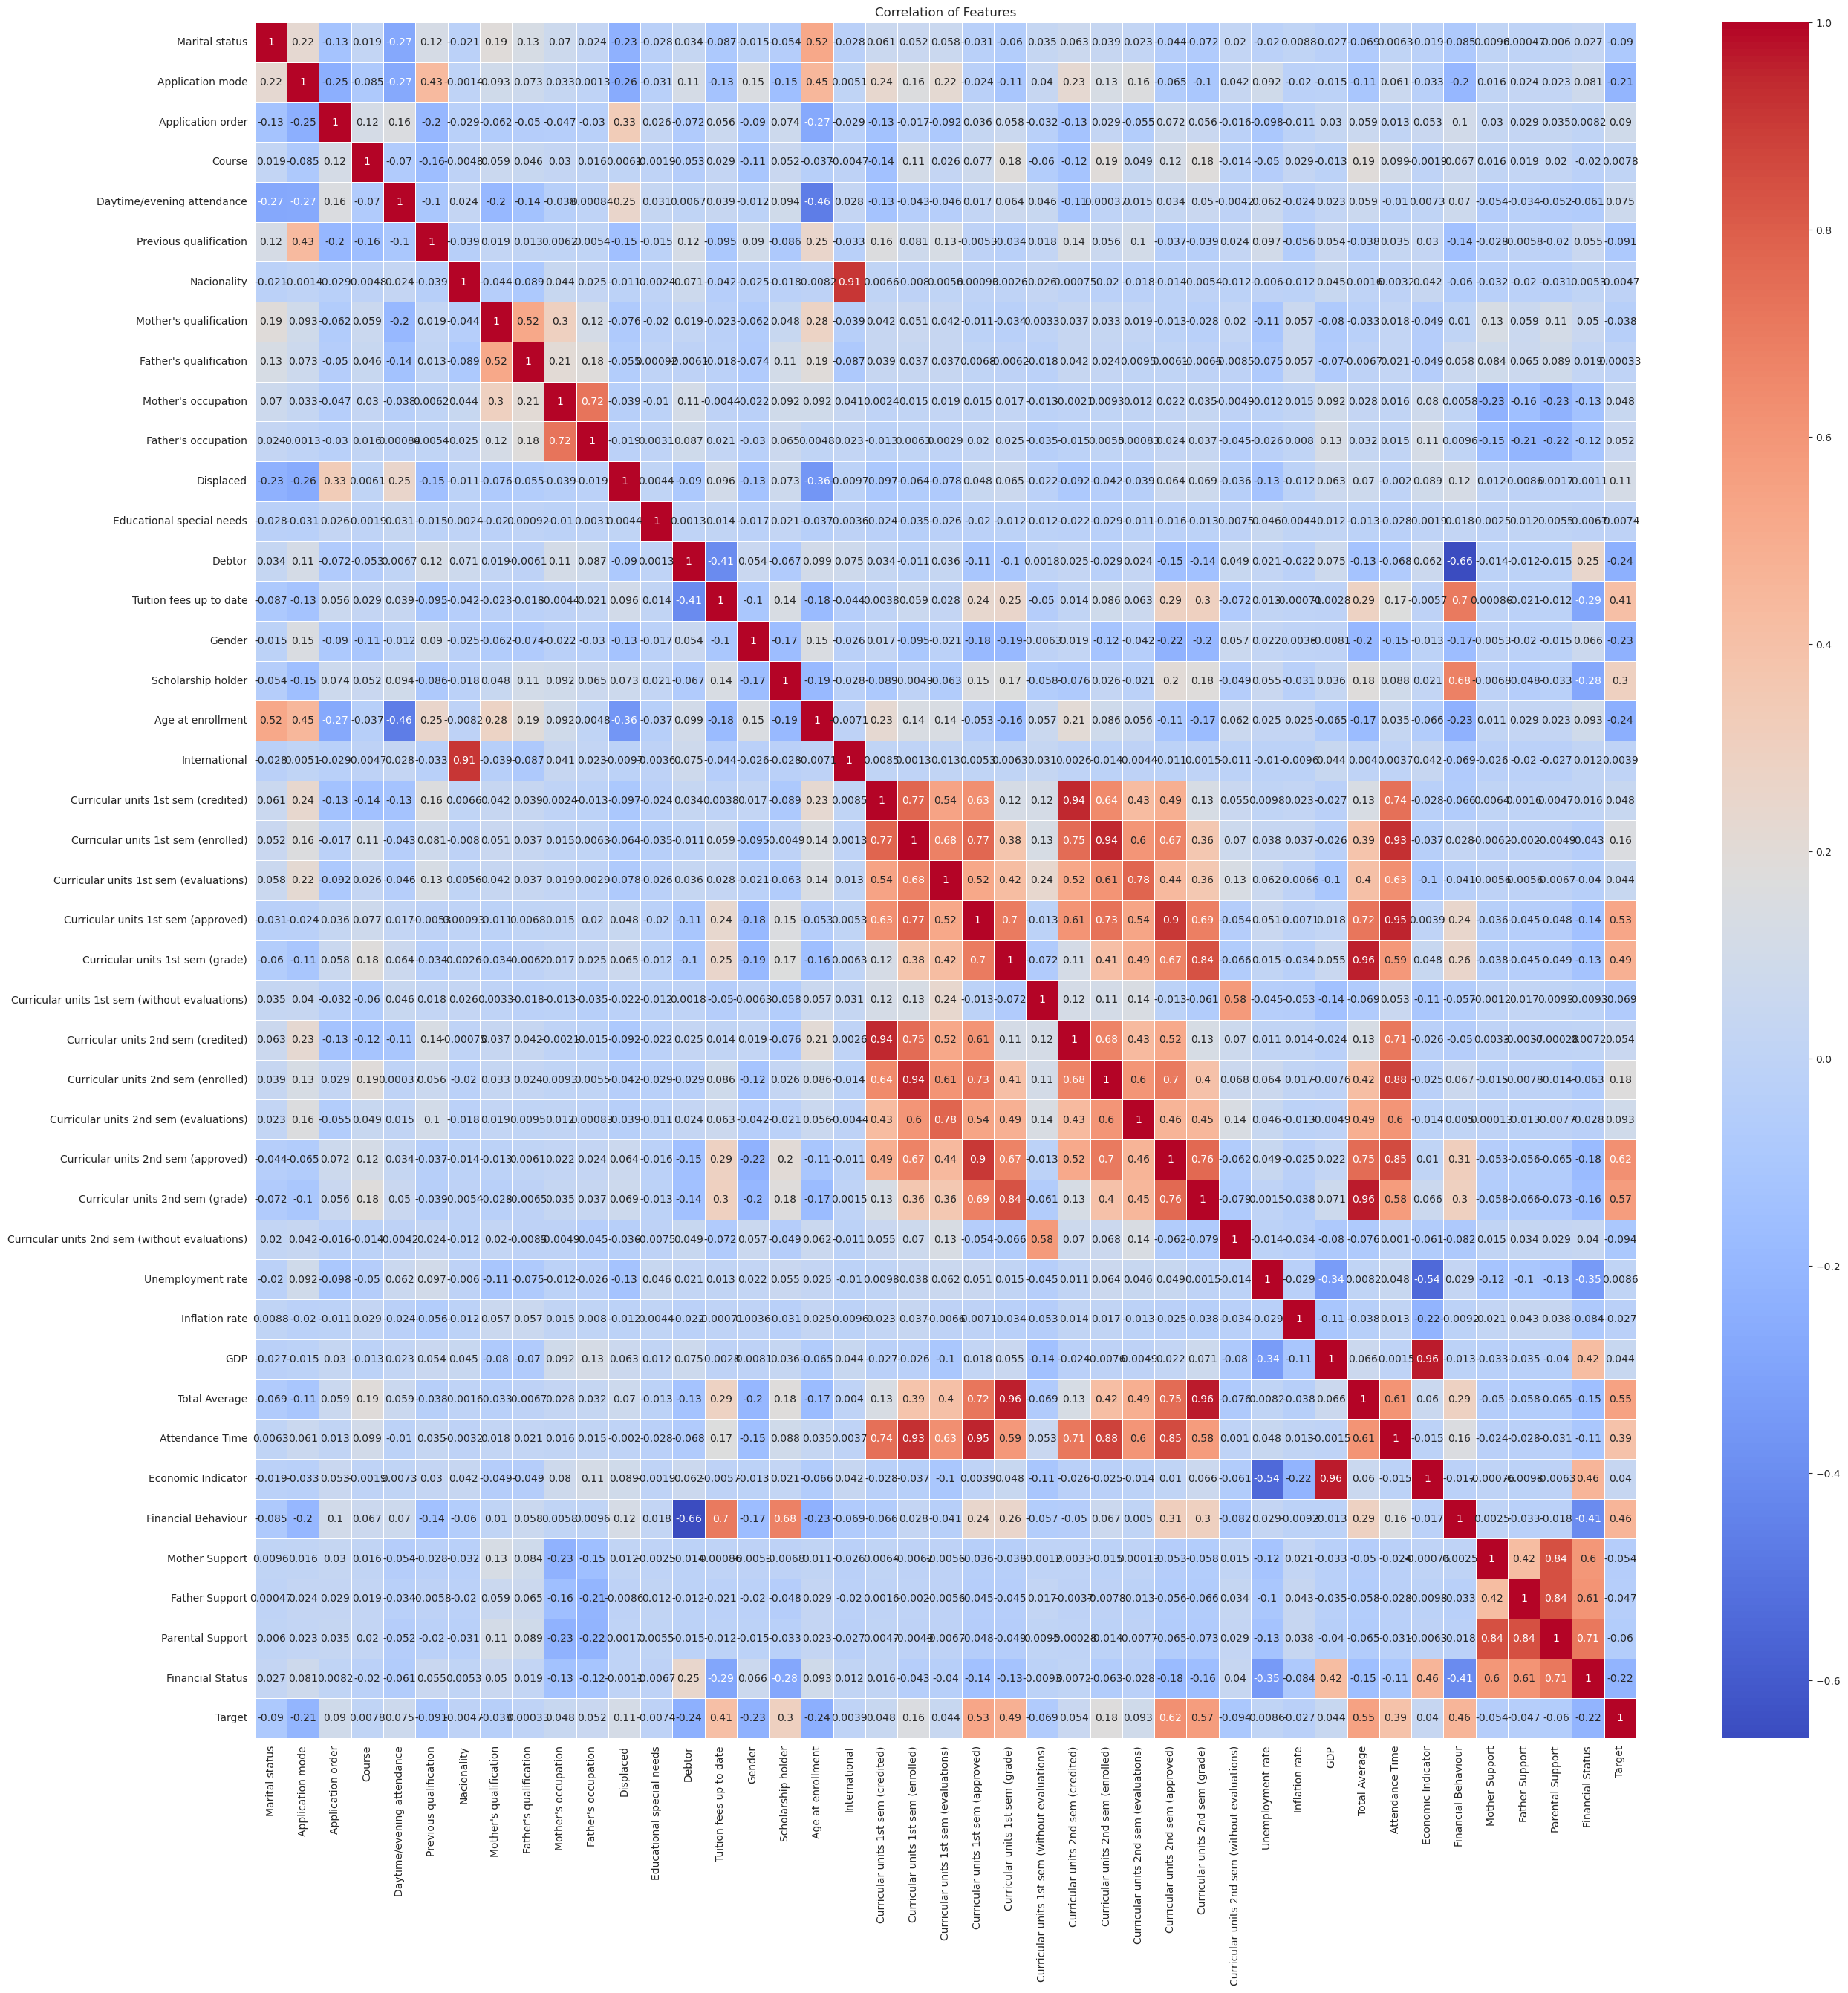

In [120]:
plt.figure(figsize=(30, 30))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features')
plt.show()

In [121]:
data_corr = data_scaled.corr()
data_corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,GDP,Total Average,Attendance Time,Economic Indicator,Financial Behaviour,Mother Support,Father Support,Parental Support,Financial Status,Target
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,-0.027003,-0.068735,0.006334,-0.019343,-0.085387,0.009591,0.000465,0.005952,0.027168,-0.089804
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,-0.014563,-0.109851,0.061433,-0.033238,-0.196590,0.015638,0.023604,0.023299,0.080894,-0.212025
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,0.030201,0.059340,0.013038,0.052546,0.099754,0.030405,0.029057,0.035281,0.008177,0.089791
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.012518,0.186994,0.098508,-0.001899,0.066570,0.015603,0.018501,0.020242,-0.020345,0.007841
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.022929,0.059467,-0.010365,0.007270,0.069873,-0.053714,-0.034301,-0.052194,-0.061472,0.075107
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.053968,-0.038171,0.035100,0.029504,-0.143976,-0.028015,-0.005782,-0.020018,0.054842,-0.091365
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,0.044563,-0.001636,-0.003236,0.041680,-0.060231,-0.031814,-0.020425,-0.030979,0.005275,-0.004740
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,-0.079664,-0.032552,0.017685,-0.049425,0.010220,0.132011,0.058902,0.113162,0.049813,-0.038346
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,-0.070200,-0.006652,0.021286,-0.049028,0.058027,0.084315,0.065458,0.088840,0.019396,0.000329
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,0.091880,0.027566,0.015867,0.080454,0.005758,-0.227661,-0.155762,-0.227395,-0.133836,0.048424


In [122]:
target_correlation = data_corr['Target'].abs()

In [123]:
target_correlation

Marital status                                    0.089804
Application mode                                  0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                            0.091365
Nacionality                                       0.004740
Mother's qualification                            0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                         0.007353
Debtor                                            0.240999
Tuition fees up to date                           0.409827
Gender                                            0.229270
Scholarship holder                                0.2975

In [124]:
# Selecting features with correlation >= 0.1
selected_features = target_correlation[target_correlation >= 0.1].index.tolist()

# Dropping features with correlation < 0.1
data_filtered = data_scaled[selected_features]

In [125]:
data_filtered

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Total Average,Attendance Time,Financial Behaviour,Financial Status,Target
0,0.210069,0.907512,-0.358167,0.368135,1.357640,-0.574914,-0.430363,-2.528560,-1.521257,-2.197107,-2.838337,-1.471527,-1.963484,-2.165954,-2.092364,-0.021041,1.093950,0
1,-0.167406,0.907512,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.109105,0.418050,0.693593,-0.105726,0.518904,0.660201,0.706615,0.194962,-1.389915,-0.080002,2
2,-1.111094,0.907512,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.109105,-1.521257,-2.197107,-0.105726,-1.471527,-1.963484,-2.165954,-0.948701,-1.389915,0.270955,0
3,0.210069,0.907512,-0.358167,0.368135,-0.736572,-0.574914,-0.430363,-0.109105,0.418050,0.575900,-0.105726,0.187165,0.416450,0.515664,0.194962,-0.021041,0.223576,2
4,0.965018,-1.101914,-0.358167,0.368135,-0.736572,-0.574914,2.864765,-0.109105,0.094832,0.348774,-0.105726,0.518904,0.531608,0.461700,0.004352,-0.021041,-0.187044,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-1.111094,-1.101914,-0.358167,0.368135,1.357640,-0.574914,-0.562168,-0.109105,0.094832,0.611001,-0.105726,0.187165,0.468271,0.561326,0.004352,-0.021041,-0.190553,2
4420,-1.111094,0.907512,2.791994,-2.716392,-0.736572,-0.574914,-0.693973,-0.109105,0.418050,0.280636,-0.105726,-0.808050,0.147748,0.220935,0.194962,-2.758790,0.428886,0
4421,-1.111094,0.907512,-0.358167,0.368135,-0.736572,1.739390,0.887688,0.294137,0.741268,0.881488,0.805144,-1.139788,0.627573,0.781335,0.576183,1.347834,-0.645043,0
4422,-1.111094,0.907512,-0.358167,0.368135,-0.736572,1.739390,-0.430363,-0.512348,0.094832,0.652297,-0.561161,0.187165,0.339678,0.511513,-0.186259,1.347834,-1.578589,2


In [126]:
print(f'Influential {len(data_filtered.columns)} featues are: {data_filtered.columns}')

Influential 18 featues are: Index(['Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Total Average', 'Attendance Time',
       'Financial Behaviour', 'Financial Status', 'Target'],
      dtype='object')


In [127]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application mode                     4424 non-null   float64
 1   Displaced                            4424 non-null   float64
 2   Debtor                               4424 non-null   float64
 3   Tuition fees up to date              4424 non-null   float64
 4   Gender                               4424 non-null   float64
 5   Scholarship holder                   4424 non-null   float64
 6   Age at enrollment                    4424 non-null   float64
 7   Curricular units 1st sem (enrolled)  4424 non-null   float64
 8   Curricular units 1st sem (approved)  4424 non-null   float64
 9   Curricular units 1st sem (grade)     4424 non-null   float64
 10  Curricular units 2nd sem (enrolled)  4424 non-null   float64
 11  Curricular units 2nd sem (appr

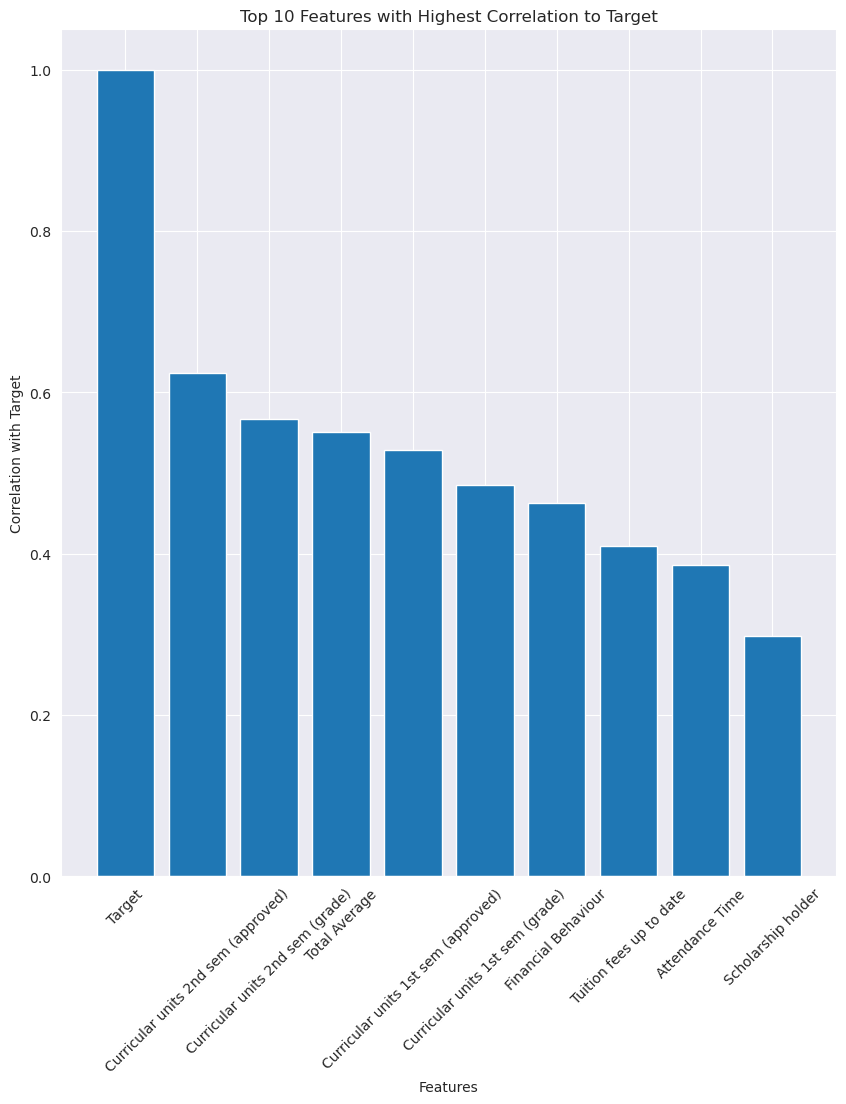

In [128]:
correlations = data_scaled.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()


In [129]:
px.histogram(data_filtered['Age at enrollment'], x='Age at enrollment', color_discrete_sequence=['lightblue'])

In [130]:
X = data_filtered.drop('Target', axis=1)
y = data_filtered['Target']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [132]:
svm = SVC(C=2, kernel='rbf',gamma='auto', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       284
           1       0.56      0.40      0.47       151
           2       0.81      0.94      0.87       450

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.71       885
weighted avg       0.77      0.78      0.77       885

[[209  34  41]
 [ 30  61  60]
 [ 14  13 423]]


In [ ]:
# param_grid = {
#     'c' : [0.1, 2],
#     'gamma' : [None, 50, 0.1],
#     'kernel' : ['rbf', 'linear']
# }

# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# best_rf = grid_search.best_estimator_
# cv_scores = cross_val_score(best_rf, X_train, y_train, cv=3)
# print(f'Cross-Validation scores: {cv_scores}')
# print(f'Mean cross-validation score: {cv_scores.mean()}')
# y_pred = best_rf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(f'Best hyper-parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# param_grid = {
#     'n_estimators' : [10,50,100],
#     'max_depth' : [None, 50],
#     'min_samples_split' : [2, 5],
#     'min_samples_leaf' : [2, 4]
# }

# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# best_rf = grid_search.best_estimator_
# cv_scores = cross_val_score(best_rf, X_train, y_train, cv=3)
# print(f'Cross-Validation scores: {cv_scores}')
# print(f'Mean cross-validation score: {cv_scores.mean()}')
# y_pred = best_rf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(f'Best hyper-parameters: {grid_search.best_params_}')

In [133]:
rf = RandomForestClassifier(n_estimators=100, max_depth=50, bootstrap=True, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       284
           1       0.57      0.46      0.51       151
           2       0.84      0.92      0.88       450

    accuracy                           0.79       885
   macro avg       0.74      0.71      0.72       885
weighted avg       0.78      0.79      0.79       885

[[217  31  36]
 [ 36  69  46]
 [ 13  22 415]]


In [134]:
catboost = CatBoostClassifier(iterations=10, learning_rate=0.7, depth=5)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)


0:	learn: 0.7416964	total: 2.87ms	remaining: 25.9ms
1:	learn: 0.6535092	total: 5.58ms	remaining: 22.3ms
2:	learn: 0.6315181	total: 8.21ms	remaining: 19.2ms
3:	learn: 0.6173742	total: 10.7ms	remaining: 16.1ms
4:	learn: 0.6059908	total: 13.5ms	remaining: 13.5ms
5:	learn: 0.5932488	total: 17ms	remaining: 11.3ms
6:	learn: 0.5855640	total: 19.7ms	remaining: 8.44ms
7:	learn: 0.5811626	total: 22.1ms	remaining: 5.52ms
8:	learn: 0.5664726	total: 24.6ms	remaining: 2.73ms
9:	learn: 0.5649518	total: 27.2ms	remaining: 0us


In [135]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       284
           1       0.56      0.36      0.44       151
           2       0.82      0.94      0.88       450

    accuracy                           0.79       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.77      0.79      0.78       885

[[222  28  34]
 [ 38  54  59]
 [ 12  15 423]]


In [136]:
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       284
           1       0.53      0.28      0.36       151
           2       0.79      0.93      0.85       450

    accuracy                           0.76       885
   macro avg       0.69      0.65      0.66       885
weighted avg       0.74      0.76      0.74       885

[[212  28  44]
 [ 44  42  65]
 [ 23  10 417]]


In [137]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

In [139]:
df = X_sm
df['Target'] = y_sm
df['Target'].value_counts()

Target
0    2209
2    2209
1    2209
Name: count, dtype: int64

In [140]:
x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column:')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

/home/farid/anaconda3/lib/python3.11/site-packages/numpy/core/numeric.py:2468: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [141]:
svm = SVC(C=2, kernel='rbf',gamma='auto', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       455
           1       0.65      0.72      0.69       435
           2       0.77      0.82      0.80       436

    accuracy                           0.75      1326
   macro avg       0.76      0.75      0.75      1326
weighted avg       0.76      0.75      0.75      1326

[[319 101  35]
 [ 51 315  69]
 [ 10  68 358]]


In [142]:
rf = RandomForestClassifier(n_estimators=100, max_depth=50, bootstrap=True, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       455
           1       0.76      0.78      0.77       435
           2       0.81      0.89      0.85       436

    accuracy                           0.81      1326
   macro avg       0.82      0.81      0.81      1326
weighted avg       0.82      0.81      0.81      1326

[[351  66  38]
 [ 41 340  54]
 [  9  39 388]]


In [ ]:
param_grid = {
    'n_estimators' : [10,50,100],
    'max_depth' : [None, 50],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=50, n_estimators=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 50], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [ ]:
best_rf = grid_search.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=3)
print(f'Cross-Validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-Validation scores: [0.78494624 0.80701754 0.78947368]
Mean cross-validation score: 0.7938124882097718


In [ ]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       455
           1       0.74      0.77      0.76       435
           2       0.81      0.89      0.84       436

    accuracy                           0.81      1326
   macro avg       0.81      0.81      0.81      1326
weighted avg       0.81      0.81      0.81      1326



In [ ]:
print(f'Best hyper-parameters: {grid_search.best_params_}')

Best hyper-parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [143]:
catboost = CatBoostClassifier(iterations=10, learning_rate=0.7, depth=5)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0:	learn: 0.7811393	total: 6.52ms	remaining: 58.7ms
1:	learn: 0.7012701	total: 10.8ms	remaining: 43.4ms
2:	learn: 0.6715166	total: 14.8ms	remaining: 34.5ms
3:	learn: 0.6526097	total: 20.4ms	remaining: 30.6ms
4:	learn: 0.6323329	total: 24.8ms	remaining: 24.8ms
5:	learn: 0.6227508	total: 28.9ms	remaining: 19.2ms
6:	learn: 0.6083860	total: 34ms	remaining: 14.6ms
7:	learn: 0.6003085	total: 37.7ms	remaining: 9.42ms
8:	learn: 0.5907982	total: 41.9ms	remaining: 4.66ms
9:	learn: 0.5775615	total: 46ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       455
           1       0.64      0.67      0.65       435
           2       0.77      0.84      0.81       436

    accuracy                           0.73      1326
   macro avg       0.73      0.73      0.73      1326
weighted avg       0.73      0.73      0.73      1326

[[312 108  35]
 [ 72 290  73]
 [ 14  54 368]]


In [144]:
xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.73       455
           1       0.66      0.54      0.60       435
           2       0.70      0.88      0.78       436

    accuracy                           0.71      1326
   macro avg       0.71      0.71      0.70      1326
weighted avg       0.71      0.71      0.70      1326

[[316  92  47]
 [ 78 236 121]
 [ 21  30 385]]


In [145]:
if isinstance(X_sm, pd.DataFrame):
    X = X_sm.values
if isinstance(y_sm, pd.Series):
    y = y_sm.values

kf = KFold(n_splits=5, shuffle=True, random_state=1220)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy}')
    
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy: {mean_accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fold accuracy: 1.0
Fold accuracy: 0.9992458521870287
Fold accuracy: 0.999245283018868
Fold accuracy: 0.999245283018868
Fold accuracy: 0.9984905660377359
Mean accuracy: 0.9992453968525001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00       440

    accuracy                           1.00      1325
   macro avg       1.00      1.00      1.00      1325
weighted avg       1.00      1.00      1.00      1325

[[424   1   0]
 [  0 460   0]
 [  0   1 439]]


In [146]:
if isinstance(X_sm, pd.DataFrame):
    X = X_sm.values
if isinstance(y_sm, pd.Series):
    y = y_sm.values

kf = KFold(n_splits=5, shuffle=True, random_state=1220)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy}')
    
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy: {mean_accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 1.0
Mean accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00       440

    accuracy                           1.00      1325
   macro avg       1.00      1.00      1.00      1325
weighted avg       1.00      1.00      1.00      1325

[[425   0   0]
 [  0 460   0]
 [  0   0 440]]


In [147]:
if isinstance(X_sm, pd.DataFrame):
    X = X_sm.values
if isinstance(y_sm, pd.Series):
    y = y_sm.values

kf = KFold(n_splits=5, shuffle=True, random_state=1220)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    catboost.fit(X_train, y_train)
    y_pred = catboost.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy}')
    
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy: {mean_accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0:	learn: 0.2340484	total: 6.22ms	remaining: 56ms
1:	learn: 0.1055474	total: 13.2ms	remaining: 52.8ms
2:	learn: 0.0512169	total: 17.4ms	remaining: 40.7ms
3:	learn: 0.0267638	total: 22.4ms	remaining: 33.6ms
4:	learn: 0.0144511	total: 28ms	remaining: 28ms
5:	learn: 0.0077701	total: 31ms	remaining: 20.7ms
6:	learn: 0.0052224	total: 34.7ms	remaining: 14.9ms
7:	learn: 0.0035922	total: 39.6ms	remaining: 9.89ms
8:	learn: 0.0027364	total: 44.6ms	remaining: 4.96ms
9:	learn: 0.0021809	total: 48.5ms	remaining: 0us
Fold accuracy: 1.0
0:	learn: 0.2340609	total: 4.67ms	remaining: 42ms
1:	learn: 0.1055488	total: 9.11ms	remaining: 36.4ms
2:	learn: 0.0512240	total: 13.5ms	remaining: 31.6ms
3:	learn: 0.0267475	total: 17.9ms	remaining: 26.8ms
4:	learn: 0.0144748	total: 21.9ms	remaining: 21.9ms
5:	learn: 0.0077816	total: 24.8ms	remaining: 16.5ms
6:	learn: 0.0052308	total: 28.5ms	remaining: 12.2ms
7:	learn: 0.0036198	total: 32.6ms	remaining: 8.15ms
8:	learn: 0.0025949	total: 36.7ms	remaining: 4.08ms
9:	lea

In [148]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00       440

    accuracy                           1.00      1325
   macro avg       1.00      1.00      1.00      1325
weighted avg       1.00      1.00      1.00      1325

[[425   0   0]
 [  0 460   0]
 [  0   0 440]]


In [149]:
if isinstance(X_sm, pd.DataFrame):
    X = X_sm.values
if isinstance(y_sm, pd.Series):
    y = y_sm.values

kf = KFold(n_splits=5, shuffle=True, random_state=1220)
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold accuracy: {accuracy}')
    
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy: {mean_accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 1.0
Fold accuracy: 1.0
Mean accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00       440

    accuracy                           1.00      1325
   macro avg       1.00      1.00      1.00      1325
weighted avg       1.00      1.00      1.00      1325

[[425   0   0]
 [  0 460   0]
 [  0   0 440]]
